In [1]:
'''
Many code snippets adapted from https://datasciencelab.wordpress.com/2013/12/12/clustering-with-k-means-in-python/
'''

%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt
sd = 0
random.seed(sd)
np.random.seed(sd)

In [2]:
def init_board_gauss(N, k):
    '''
    Generate points centered around k Gaussians.
    '''
    n = float(N)/k
    X = []
    for i in range(k):
        c = (random.uniform(-1,1), random.uniform(-1,1))
        s = random.uniform(0.05,0.15)
        x = []
        while len(x) < n:
            a,b = np.array([np.random.normal(c[0],s),np.random.normal(c[1],s)])
            if abs(a) and abs(b)<1:
                x.append([a,b])
        X.extend(x)
    X = np.array(X)[:N]
    return X

In [3]:
def has_converged(oldmu, mu):
    '''
    Check if k-means has converged i.e. there is no change in 
    cluster assignment from last iteration to current iteration.
    '''
    K = len(oldmu)
    return(set([tuple(a) for a in mu]) == \
           set([tuple(a) for a in oldmu])\
           and len(set([tuple(a) for a in mu])) == K)

In [4]:
def reevaluate_centers(clusters):
    '''
    Compute the centers of each cluster.
    '''
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        newmu.append(np.mean(clusters[k], axis = 0))
    return newmu

In [5]:
def cluster_points(X, mu):
    '''
    Assign points to the closest cluster center.
    '''
    clusters  = {}
    for x in X:
        bestmukey = min([(i[0], np.linalg.norm(x-mu[i[0]])) \
                         for i in enumerate(mu)], key=lambda t:t[1])[0]
        try:
            clusters[bestmukey].append(x)
        except KeyError:
            clusters[bestmukey] = [x]
    return clusters

In [6]:
def plot_board(X, K, mu=None, clus=None):
        '''
        Visualize the points in 2D.
        '''
        fig = plt.figure(figsize=(5,5))
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        
        mew = 1
        if mu and clus:
            for m, clu in clus.items():
                cs = plt.cm.spectral(1.*m/K)
                plt.plot(mu[m][0], mu[m][1], 'o', marker='*', \
                         markersize=12, color=cs, mew=mew)
                plt.plot(zip(*clus[m])[0], zip(*clus[m])[1], '.', \
                         markersize=8, color=cs, alpha=0.5)
        elif mu:
            plt.plot(zip(*X)[0], zip(*X)[1], '.', alpha=0.5)
            for (m, ctr) in enumerate(mu):
                cs = plt.cm.spectral(1.*m/K)
                plt.plot(ctr[0], ctr[1], 'o', marker='*', \
                         markersize=12, color=cs, mew=mew)
        else:
            plt.plot(zip(*X)[0], zip(*X)[1], '.', alpha=0.5)
        
        tit = 'K-means with random initialization'
        # plt.title('\n'.join([pars, tit]), fontsize=16)
        plt.show()
        plt.close()

In [7]:
'''
TODO 0: Set K and N as per your choice. (Make sure 0<K<N!)
'''
K = 5
N = 1000

In [8]:
X = init_board_gauss(N, K)

In [9]:
def find_centers(X, K):
        '''
        Run k-means algorithm.
        '''
        mu = None
        clusters = None
        print 'k-means begins!'
        it = 1
        
        print 'Initial layout of points'
        plot_board(X, K, mu, clusters)
        print '*'*30
        
        oldmu = random.sample(X, K)
        
        print 'Step 0: Initialize cluster centers randomly.'
        '''
        TODO 1: Initialize the cluster centers as K random points.
        Hint: The assignment of mu will be similar to the assignment of oldmu above.
        '''
        mu = random.sample(X, K)
        
        while not has_converged(oldmu, mu):
            
            oldmu = mu
            plot_board(X, K, mu, clusters)
            print '*'*30
            
            print 'Iteration:', it
            
            print 'Step 1: Assign clusters'
            '''
            TODO 2: Assign points to the closest center.
            '''
            clusters = cluster_points(X, mu)
            plot_board(X, K, mu, clusters)
            
            print 'Step 2: Re-evaluate centers'
            '''
            TODO 3: Compute the centers of each cluster.
            '''
            mu = reevaluate_centers(clusters)
            
            it += 1
            
        print 'k-means has converged!'
        plot_board(X, K, mu, clusters)

k-means begins!
Initial layout of points


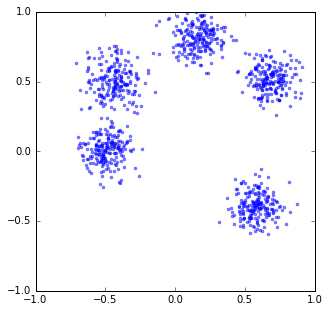

******************************
Step 0: Initialize cluster centers randomly.


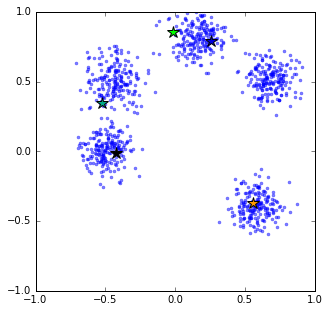

******************************
Iteration: 1
Step 1: Assign clusters


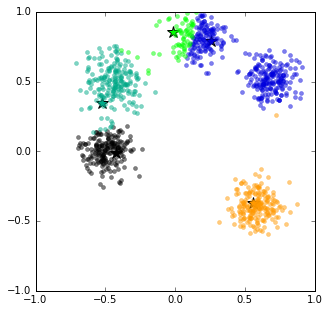

Step 2: Re-evaluate centers


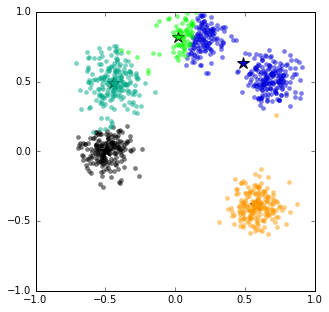

******************************
Iteration: 2
Step 1: Assign clusters


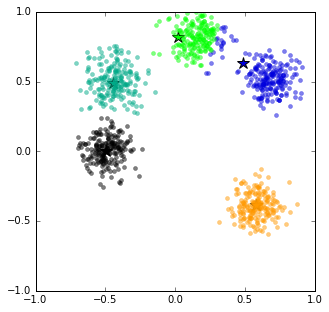

Step 2: Re-evaluate centers


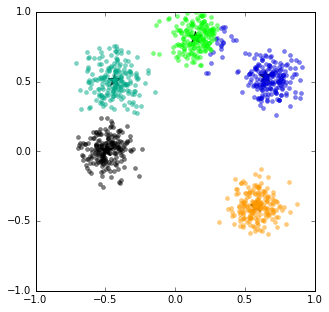

******************************
Iteration: 3
Step 1: Assign clusters


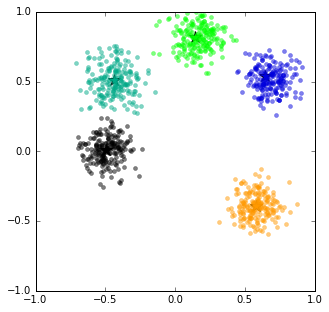

Step 2: Re-evaluate centers


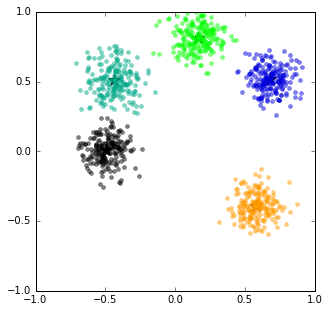

******************************
Iteration: 4
Step 1: Assign clusters


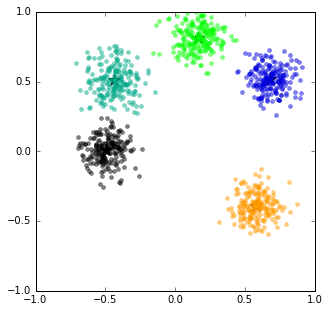

Step 2: Re-evaluate centers
k-means has converged!


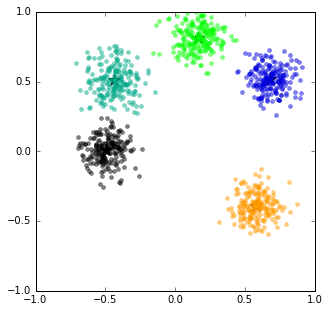

In [10]:
find_centers(X, K)